In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = [10, 8]
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import math
import seaborn as sns


# set seed for reproducibility
np.random.seed(0)

# Read and explore the given dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Recommendation Systems/Electronic_dataset.csv')

In [ ]:
df.head()

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [ ]:
df.shape

(500000, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    500000 non-null  object 
 1   prod_id    500000 non-null  object 
 2   ratings    500000 non-null  float64
 3   timestamp  500000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


In [4]:
df.drop('timestamp', axis=1, inplace= True)

In [ ]:
df.head()

,user_id,prod_id,ratings
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0
2,A1SINU2I4IOPNU,B000GBO9IM,4.0
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0


In [5]:
df.rename(columns={'user_id' : 'users', 'prod_id':'items'}, inplace= True)

In [ ]:
df.head()

,users,items,ratings
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0
2,A1SINU2I4IOPNU,B000GBO9IM,4.0
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0


In [ ]:
df.shape

(500000, 3)

In [ ]:
df.isnull().sum()

users      0
items      0
ratings    0
dtype: int64

In [ ]:
df.isna().sum()

users      0
items      0
ratings    0
dtype: int64

In [6]:
df.describe().T # Rating are ranging from 1-5

,count,mean,std,min,25%,50%,75%,max
ratings,500000.0,4.013172,1.379996,1.0,3.0,5.0,5.0,5.0


In [ ]:
df['users'].value_counts().head() # A680RUE1FDO8B user given more number of reviews

A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
Name: users, dtype: int64

In [ ]:
df['items'].value_counts().head() # B0074BW614 product has been rated more than any other items

B0074BW614    1138
B00DR0PDNE    1094
B007WTAJTO     883
B0019EHU8G     774
B006GWO5WK     770
Name: items, dtype: int64

In [ ]:
print("User:" ,df['users'].nunique())
print("Item:" ,df['items'].nunique())
print("Rating:", df['ratings'].nunique()) 

User: 448368
Item: 130138
Rating: 5


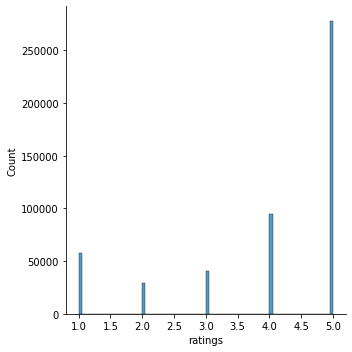

In [ ]:
sns.displot(df.ratings)

## **Popularity Based**

In [9]:
df.groupby('items')['ratings'].mean().sort_values(ascending=False).head(10) # Most Liked Items

items
BT008G3W52    5.0
B004AC52UC    5.0
B004AGJRMC    5.0
B004AGED3A    5.0
B004AFOK2U    5.0
B004AFISUK    5.0
B004AFFZNI    5.0
B004AFEYU8    5.0
B004AEVIOY    5.0
B004AEVI4Y    5.0
Name: ratings, dtype: float64

In [8]:
df.groupby('items')['ratings'].mean().sort_values(ascending=True).head(10) # Least Liked Items

items
0439886341    1.0
B00028LF8Q    1.0
B00DKVY35O    1.0
B00DKRX7LO    1.0
B0092TLBA8    1.0
B0012RX0OI    1.0
B0012S503G    1.0
B0050UAE5G    1.0
B0050UNO44    1.0
B00028VKL8    1.0
Name: ratings, dtype: float64

In [25]:
df.groupby('users')['ratings'].mean().sort_values(ascending=False).head(10) #top users who has given highest ratings 

users
A1G7R0UD9JW9PK    5.0
A30YRZHUDGLEK0    5.0
A30YQBOZEHKFI4    5.0
A1JPRTW3MMXS31    5.0
A30YQKSXH97I1I    5.0
A30YR30EGAC3VX    5.0
A30YRHJ3CMMGAU    5.0
A30YRTLX2ZPFK4    5.0
A30YSD1KPNIARH    5.0
A30YGV6DXW44QU    5.0
Name: ratings, dtype: float64

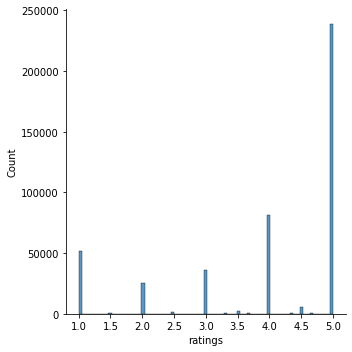

In [ ]:
item_rating = pd.DataFrame(df.groupby('users')['ratings'].mean())
sns.displot(item_rating.ratings)

most of the users have given ratings 5

In [10]:
users_rating = df.groupby('users')['ratings'].count()
items_rating = df.groupby('items')['ratings'].count()

In [12]:
df_final = df.join(users_rating,on='users',rsuffix='_user_count')

In [ ]:
df_final.rename(columns={'ratings_user_count':'number_ratings_by_user'}, inplace=True)

In [13]:
df_final.head(5)

,users,items,ratings,ratings_user_count
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1


In [15]:
df_final = df_final.join(items_rating, on='items', rsuffix='_product_count')

In [16]:
df_final.rename(columns={'ratings_product_count':'number_ratings_for_product'}, inplace=True)

In [17]:
df_final.head(5)

,users,items,ratings,ratings_user_count,number_ratings_for_product
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1,183
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1,10
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1,15
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1,4
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1,35


In [19]:
dff = df_final.drop(labels=['users'],axis=1)

In [20]:
dff.head()

,items,ratings,ratings_user_count,number_ratings_for_product
0,B0058UUR6E,5.0,1,183
1,B009ID0VVS,5.0,1,10
2,B000GBO9IM,4.0,1,15
3,B00CDCIOHO,3.0,1,4
4,B000MS3VGA,5.0,1,35


In [21]:
popularity_df = dff.groupby('items')['ratings','number_ratings_for_product'].mean().sort_values(by='number_ratings_for_product', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [22]:
popularity_df.head(10)

,ratings,number_ratings_for_product
items,,
B0074BW614,4.465729,1138
B00DR0PDNE,3.943327,1094
B007WTAJTO,4.417894,883
B0019EHU8G,4.740310,774
B006GWO5WK,4.275325,770
B003ELYQGG,4.386928,765
B003ES5ZUU,4.684288,681
B00622AG6S,4.419162,668
B007R5YDYA,4.738998,659


The highest no.of ratings given for the product B0074BW614.

In [27]:
!pip install surprise

     |████████████████████████████████| 11.8MB 234kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617547 sha256=68058538b1f31eb9601a08833197f1200014d3cc9abc0db4a6388ea491005a28
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [28]:
from surprise import Dataset, Reader
from surprise import KNNWithMeans,accuracy,Prediction
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

In [30]:
reader = Reader()

data = Dataset.load_from_df(df_final[['users','items','ratings']][:50000], reader=reader)

In [31]:
trainset, testset, = train_test_split(data, test_size=.3, random_state=123)

In [33]:
model = SVD()
model.fit(trainset)

In [34]:
predictions = model.test(testset)

In [35]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [36]:
top_n = get_top_n(predictions,n=5)

In [42]:
print("The RMSE value",accuracy.rmse(predictions))
print("The MAE value",accuracy.mae(predictions))

RMSE: 1.3645
The RMSE value 1.3644941883938249
MAE:  1.0846
The MAE value 1.0846281581804882


In [38]:
top_n

defaultdict(list,
            {'A3NXFO0YEGO65N': [('B004S5ECRA', 4.005942857142857)],
             'A188ZV6DL8AZ7N': [('B004Q0PT3I', 4.166149242580214)],
             'A1FF0THNPF0GM7': [('B00CUGCAIM', 4.005942857142857)],
             'A2V8V236B1HNGU': [('B003IPC5FW', 4.005942857142857)],
             'ABYQ5DQ9FIA9F': [('B005Q67LDW', 4.005942857142857)],
             'A37XXLO5DI4XDV': [('B003XCHBH2', 4.005942857142857)],
             'A2ZYNKEKZLW5O0': [('B007R5YDYA', 4.727178984163186)],
             'A3F8JYA9QONBTA': [('B003MX4D0U', 4.034021616846364)],
             'A2JOS6IULTWZ9Z': [('B005ENV5QQ', 4.005942857142857)],
             'A3F2R2LZT3ATN3': [('B008B81ZDE', 3.9936480367946023)],
             'AV1TN3WUWOT0P': [('B00267GDM4', 4.02100763282771),
              ('B00ACF8XWA', 4.005942857142857)],
             'A2Q1RUIPEVKT28': [('B004JRDRPK', 4.005942857142857)],
             'ARYDQJ8CUIL1N': [('B005C31HC0', 3.5731159104170387)],
             'A3UOA8WL20X3FY': [('B00J5YM3U2', 4.00

In [39]:
accuracy.fcp(predictions)

FCP:  0.5037


0.5037115588547191

Popularity based system is very useful for new users,it recommends the products which received good ratings and on high demand. 

Popularity based system has no personalized recommandations


Collaborative filtering has the personalized recommandations based on previous purchases of items and ratings.

Singular Value Decomposition model with the help of matrix_factorization by spreading the variance of users and items, has predicted rating of a item by a user, a item is recommended to him based on other ratings.

If we dont have user rating information its good to use Popularity based system in order to avoid cold start problem, 
If we have user data(user ratings) then we can use collaborative filtering(IBCF/UBCF) to providing personalized recommandations based on users interests.